In [33]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [63]:
# Download historical data from Yahoo Finance
start = '2010-01-01'
end = '2019-12-31'
df = yf.download('SBIN.NS')

[*********************100%%**********************]  1 of 1 completed


In [64]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600


In [65]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,49537800
2024-04-24,166.539993,169.300003,166.210007,169.020004,169.020004,48251800
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.889999,50558300
2024-04-26,169.880005,171.339996,169.179993,169.300003,169.300003,44525100


In [15]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481930,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378826,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [17]:
df = df.drop(['Date','Adj Close'],axis=1)

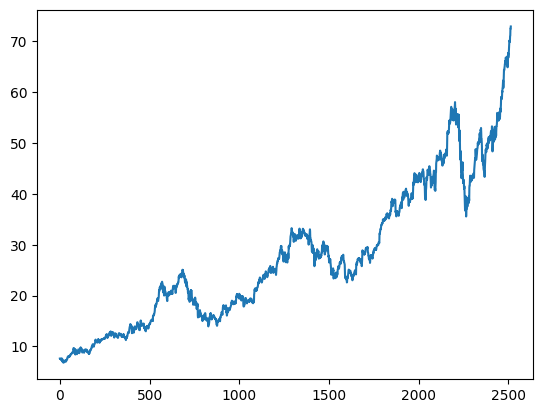

In [18]:
plt.plot(df.Close)

In [19]:
ma100 = df.Close.rolling(100).mean()

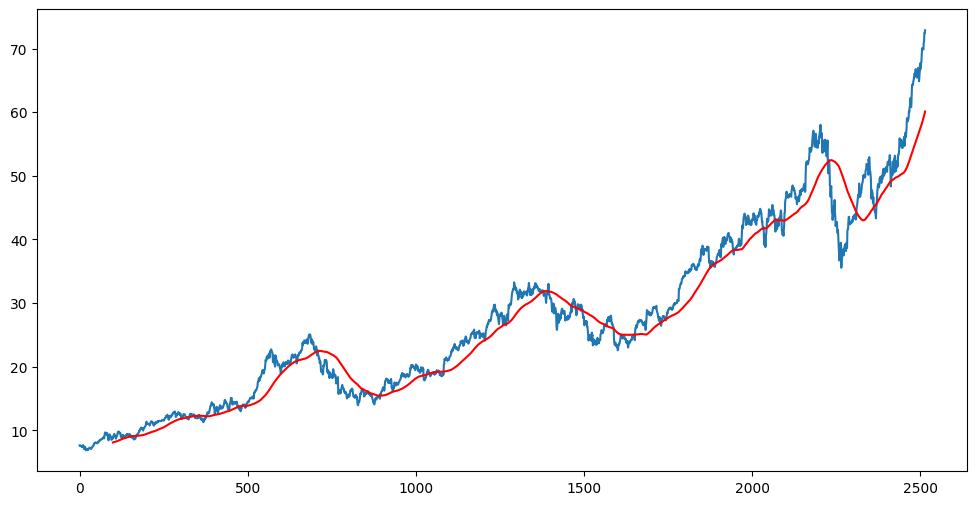

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [22]:
ma200 = df.Close.rolling(200).mean()

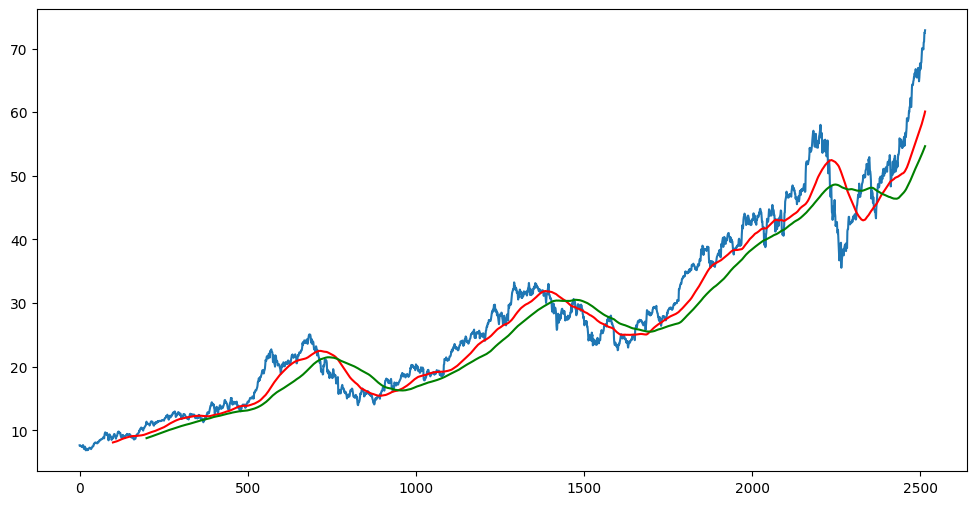

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [24]:
df.shape

(2515, 5)

In [26]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1760, 1)
(755, 1)


In [27]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [28]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [29]:
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_training)


,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [31]:
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [32]:
X_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

X_train,y_train = np.array(X_train) , np.array(y_train)

In [34]:
from keras.layers import Dense , Dropout,LSTM
from keras.models import Sequential

In [35]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences= True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences= True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\Prath\OneDrive\Desktop\project\my_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 0.0995
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.0115
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - loss: 0.0105
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 0.0091
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 0.0083
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.0080
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0091
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0081
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0073
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0074
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0068
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0066
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.0070
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0061
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - l

In [38]:
model.save('keras_model.h5')

In [39]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [40]:
past_100_days = data_training.tail(100)

In [48]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [49]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [50]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [51]:
input_data.shape

(855, 1)

In [52]:
X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [53]:
X_test , y_test = np.array(X_test), np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [54]:
y_predicted = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


In [55]:
y_predicted.shape

(755, 1)

In [56]:
y_predicted

array([[0.11376846],
       [0.11386921],
       [0.11397341],
       [0.11407898],
       [0.11418411],
       [0.11428729],
       [0.11438788],
       [0.11448662],
       [0.1145854 ],
       [0.11468777],
       [0.11479709],
       [0.11491413],
       [0.1150414 ],
       [0.1151827 ],
       [0.11534025],
       [0.11551493],
       [0.11570737],
       [0.11591667],
       [0.11614875],
       [0.11641507],
       [0.1167254 ],
       [0.11708438],
       [0.11749017],
       [0.11797184],
       [0.11858062],
       [0.11936237],
       [0.12035629],
       [0.12159492],
       [0.12309997],
       [0.12487926],
       [0.12692362],
       [0.12921554],
       [0.13173927],
       [0.13447963],
       [0.13741466],
       [0.14051619],
       [0.14375779],
       [0.14711326],
       [0.15054952],
       [0.15403008],
       [0.15751988],
       [0.16098505],
       [0.16441107],
       [0.16778946],
       [0.17111608],
       [0.17438464],
       [0.17758541],
       [0.180

In [58]:
sc = scaler.scale_

In [59]:
scale_factor = 1/sc

In [60]:
print(scale_factor)

[47.09749794]


In [61]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

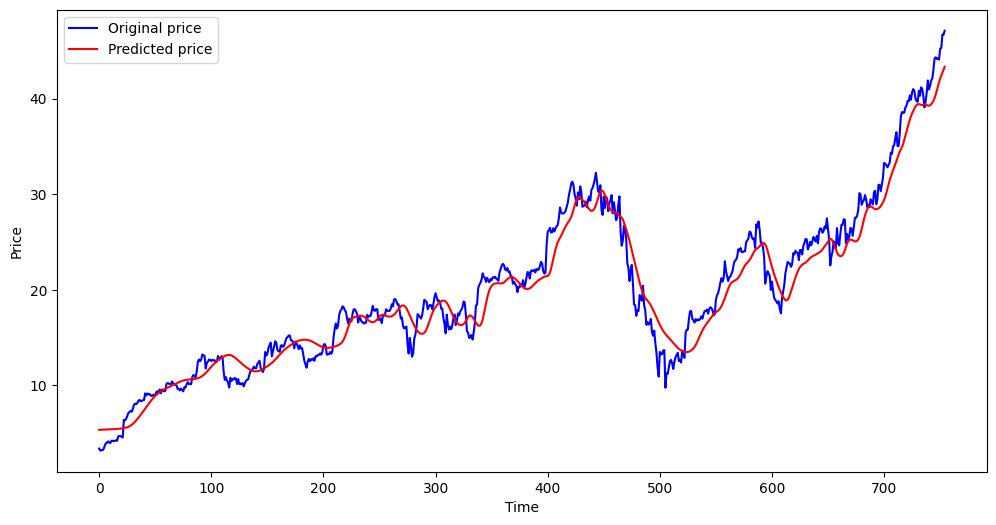

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'Original price')
plt.plot(y_predicted, 'r',label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()